In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
  'data/fb_stock_prices_2018.csv',
  index_col='date',
  parse_dates=True
)

quakes = pd.read_csv('data/earthquakes.csv')

covid = pd.read_csv('data/covid19_cases.csv').assign(
  date=lambda x: \
  pd.to_datetime(x.dateRep, format='%d/%m/%Y')
  ).set_index('date').replace(
  'United_States_of_America', 'USA'
  ).sort_index()['2020-01-18':'2020-09-18']

<Axes: title={'center': 'evolution with time'}, xlabel='date'>

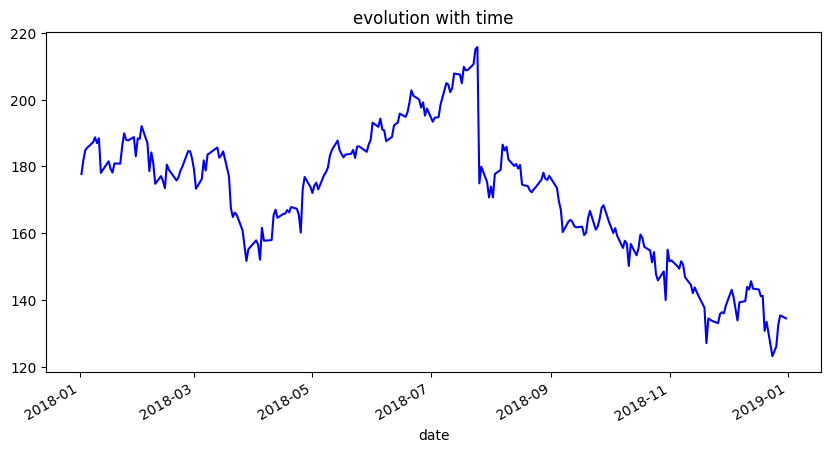

In [4]:
fb.plot(
  kind='line',
  y='open',
  figsize=(10,5),
  style='-b',
  legend=False,
  title='evolution with time'
)

KeyError: '1W'

/var/folders/bq/607d7x5j03d580qh9jj6h7z40000gn/T/ipykernel_95187/3938238453.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.first('1W').plot(


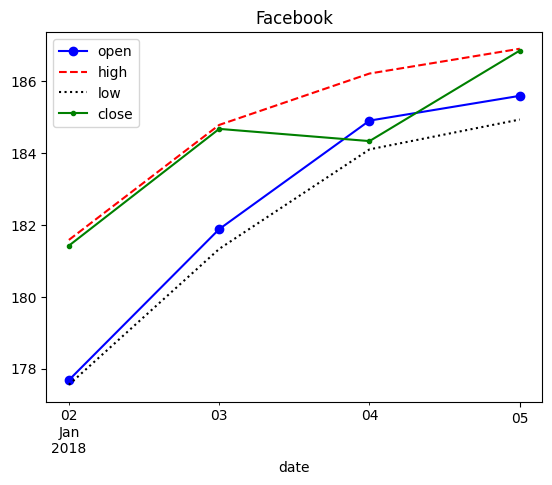

In [5]:
fb.first('1W').plot(
  y=['open', 'high', 'low', 'close'],
  style=['o-b', '--r', ':k', '.-g'],
  title='Facebook'
).autoscale()